# TUGAS 4 - KECERDASAN KOMPUTASIONAL

## SVM Classification

### Nama    : Anggito Anju Hartawan Manalu
### Kelas   : Kecerdasan Komputasional (KK) F
### NRP     : 5025201216

### Penjelasan Tugas

Pada tugas kali ini saya akan mengimplementasikan SVM Classification pada Python. Disini saya akan menggunakan dataset yang sudah tersedia pada modul sklearn. Saya akan menggunakan dataset pasien penyakit kanker payudara.

# 1. Import Dataset

Pertama-tama kita harus meng-import dataset yang nantinya akan kita klasifikasikan

In [4]:
# Load Sklearn Dataset
from sklearn import datasets

rawData = datasets.load_breast_cancer()

# 2. Explore Dataset

Kita juga dapat mengetahui lebih lagi tentang dataset yang akan digunakan agar lebih mengenal data yang akan kita klasifikasikan

In [15]:
# Ubah Dictionary ke Dataframe
import pandas as pd

df = pd.DataFrame(rawData.data, columns=rawData.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
print("Besar Data : ", df.shape)
print("Fitur : ", df.columns)
print("Label/Target : ", rawData.target_names)

Besar Data :  (569, 30)
Fitur :  Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
Label/Target :  ['malignant' 'benign']


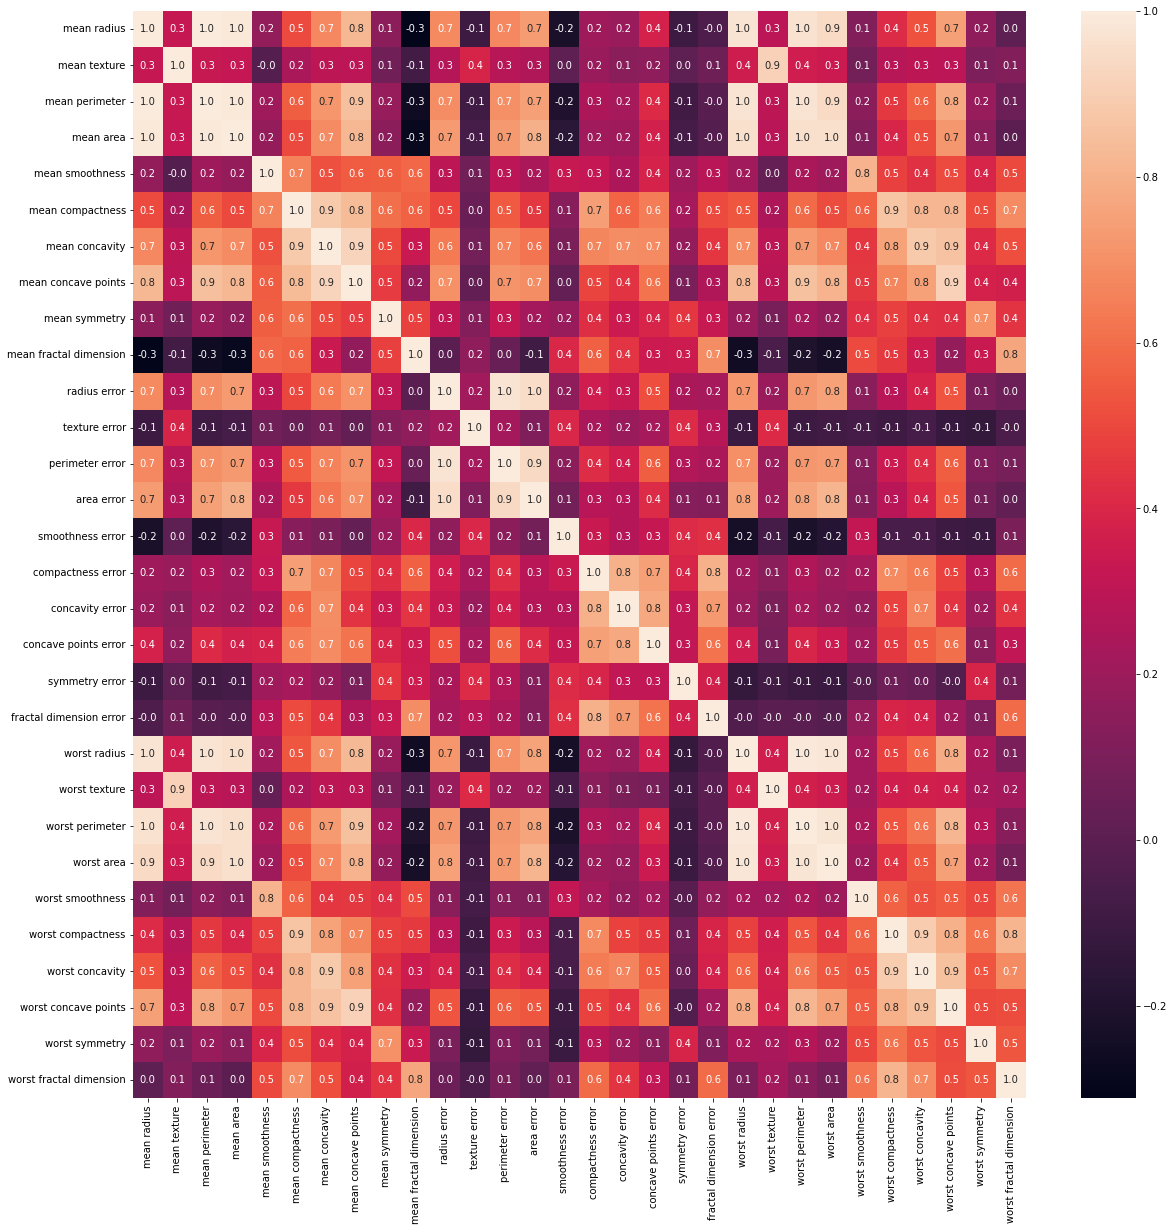

In [80]:
# Visualisasi Korelasi antar Fitur

import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop(['label'], axis=1).corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.1f')
plt.show()

# 3. Lengkapi Dataframe dengan Menambahkan Label

Kita mengetahui bahwa saat mengubah dictionary ke dataframe, kita belum memasukkan label pada tiap datanya, maka dari itu, kita akan menambahkan kolom baru bernama "label" untuk menyimpan data label.

In [22]:
df['label'] = rawData.target

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


Kita mendapatkan bahwa label bernilai '0' atau '1'. Hal ini menunjukkan bahwa 0 untuk data berlabel "malignant" dan 1 untuk data berlabel "benign"

# 4. Pisahkan Data Train dan Data Test

Pada data ini kita akan menggunakan 75% data sebagai training dan 25% data sebagai testing

In [23]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['label'], axis=1), df['label'], test_size=0.25, random_state=80)

# 5. Normalisasi Data

Untuk mengecilkan kemungkinan terjadinya Underfitting maupun Overfitting, kita akan menormalisasi data.

In [24]:
# Normalisasi Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Implementasi SVM

Disini kita akan melakukan melakukan implementasi SVM dengan 4 kernel berbeda, yakni linear, polinomial, rbf, dan sigmoid dan menggunakan C parameter berbeda-beda untuk menemukan akurasi terbaik untuk setiap trainingnya.

## LINEAR

In [63]:
# Implementasi SVM - Linear
from sklearn.svm import SVC

linearSVC = SVC(kernel='linear', C=1.0)
linearSVC.fit(X_train, y_train)

SVC(kernel='linear')

In [64]:
# Evaluasi Model - SVM Linear - C=1.0
from sklearn.metrics import classification_report, confusion_matrix

y_pred = linearSVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[57  5]
 [ 1 80]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        62
           1       0.94      0.99      0.96        81

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



Setelah kita lakukan evaluasi pada model yang telah di train, kita mendapatkan hasil akurasi 96% dengan kernel linear dengan besar C Parameter = 1.0. Kita akan mencoba mengubah C Parameternya menjadi 150.0

In [61]:
# Implementasi SVM - Linear
from sklearn.svm import SVC

linearSVC = SVC(kernel='linear', C=200.0)
linearSVC.fit(X_train, y_train)

SVC(C=200.0, kernel='linear')

In [62]:
# Evaluasi Model - SVM Linear - C=100.0
from sklearn.metrics import classification_report, confusion_matrix

y_pred = linearSVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56  6]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        62
           1       0.93      0.98      0.95        81

    accuracy                           0.94       143
   macro avg       0.95      0.94      0.94       143
weighted avg       0.95      0.94      0.94       143



Kita mendapatkan akurasinya mengecil saat kita naikkan C Parameternya menjadi 150.0.

## Polinomial

In [67]:
# Implementasi SVM - Polinomial

polySVC = SVC(kernel='poly', degree=3, C=1.0)
polySVC.fit(X_train, y_train)

# Evaluasi Model - SVM Polinomial - C=1.0
from sklearn.metrics import classification_report, confusion_matrix

y_pred = polySVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56  6]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        62
           1       0.93      0.98      0.95        81

    accuracy                           0.94       143
   macro avg       0.95      0.94      0.94       143
weighted avg       0.95      0.94      0.94       143



Kita akan melakukan step-by-step yang sama pada kernel lain untuk mengecek akurasi dari model train kita. Disini kita mendapatkan angka 94% untuk C=1.0 pada poly dengan degree=3. Kita akan mencoba dengan C parameter lain.

In [72]:
# Implementasi SVM - Polinomial

polySVC = SVC(kernel='poly', degree=10, C=150.0)
polySVC.fit(X_train, y_train)

# Evaluasi Model - SVM Polinomial - C=100.0
from sklearn.metrics import classification_report, confusion_matrix

y_pred = polySVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52 10]
 [ 1 80]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90        62
           1       0.89      0.99      0.94        81

    accuracy                           0.92       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.93      0.92      0.92       143



Seperti yang kita lihat, angka akurasi menurun drastis menjadi 92% pada saat degree dinaikkan menjadi 5 dan C Parameternya diubah menjadi 150

## RBF

In [73]:
# Implementasi SVM - RBF

rbfSVC = SVC(kernel='rbf', C=1.0)
rbfSVC.fit(X_train, y_train)

# Evaluasi Model - SVM RBF - C=1.0
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rbfSVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[58  4]
 [ 1 80]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        62
           1       0.95      0.99      0.97        81

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



Setelah kita mencoba menggunakan RBF kita mendapatkan angka 97% akurasi dengan C=1.0. Kita akan mencoba dengan angka C lain

In [76]:
# Implementasi SVM - RBF

rbfSVC = SVC(kernel='rbf', C=150.0)
rbfSVC.fit(X_train, y_train)

# Evaluasi Model - SVM RBF - C=150.0
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rbfSVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[57  5]
 [ 1 80]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        62
           1       0.94      0.99      0.96        81

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



Seperti yang kita lihat, kita mendapatkan akurasi yang menurun menjadi 96% pada saat menggunakan C=150.0

## Sigmoid

In [77]:
# Implementasi SVM - Sigmoid

sigmoidSVC = SVC(kernel='sigmoid', C=1.0)
sigmoidSVC.fit(X_train, y_train)

# Evaluasi Model - SVM Sigmoid - C=1.0
from sklearn.metrics import classification_report, confusion_matrix

y_pred = sigmoidSVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2 60]
 [38 43]]
              precision    recall  f1-score   support

           0       0.05      0.03      0.04        62
           1       0.42      0.53      0.47        81

    accuracy                           0.31       143
   macro avg       0.23      0.28      0.25       143
weighted avg       0.26      0.31      0.28       143



Sayangnya dengan model yang kita miliki, kita mendapatkan angka akurasi yang sangat kecil pada kernel sigmoid, yaitu di angka 31% akurasi. Hal ini dikarenakan kernel sigmoid adalah kernel yang sangat baik jika digunakan pada dataset yang hanya dipengaruhi oleh 2 fitur (binary classification). Hal ini membuat sigmoid kurang baik digunakan untuk klasifikasi data dengan fitur yang banyak.